# Problem Statement
**In the highly competitive restaurant industry, it is essential for stakeholders to understand the factors that drive business success.This project leverages the Yelp dataset to explore the relationship between user engagement (such as reviews, tips, and check-ins) and key success metrics (including review count and ratings) for restaurants.**

# Research Objectives
1. **Quantify the Correlation Between User Engagement(reviews, tips, check-ins) and Success Metrics:** Assess how user engagement through reviews, tips, and check-ins impacts key restaurant success metrics such as review count, average rating, and overall visibility.
2. **Analyze the Influence of Restaurant Attributes on Customer Satisfaction and Ratings:** Investigate how specific attributes (e.g., parking, alcohol availability, happy hour, 24-hour service) affect customer satisfaction and correlate with higher ratings and reviews.
3. **Examine the Role of Elite Users in Shaping Restaurant Success:** Explore the impact of elite users' reviews and tips on restaurant visibility, ratings, and reputation compared to non-elite users, and how this contributes to long-term success.
4. **Identify Regional and Seasonal Trends in Restaurant Success:** Analyze how restaurant success metrics (review count, ratings) vary across different cities and regions, and how user engagement trends shift during peak seasons to optimize marketing and operations.
5. **Evaluate the Sentiment of User Reviews and its Impact on Ratings:** Determine how the sentiment of reviews and tips (useful, funny, cool) correlates with success metrics, such as average ratings and review count, to understand how positive engagement drives business performance.

# Hypothesis Testing
1. Higher levels of user engagement (more reviews, tips, and check-ins) correlate with higher review counts, average ratings, and overall business success for restaurants.

2. Positive sentiment in reviews (useful, funny, cool) significantly contributes to higher average ratings and increased review counts for restaurants.

3. Restaurants with specific attributes (e.g., parking, alcohol availability, happy hour) will have higher average ratings and greater customer satisfaction compared to those without these features.

4. Elite users have a greater influence on restaurant visibility and ratings compared to non-elite users, leading to a disproportionate contribution to restaurant success.

5. Regional and seasonal trends affect restaurant success, with restaurants in certain cities and seasons showing higher engagement, ratings, and review counts.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import sqlite3
import folium
import pandas as pd
from geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Database Overview :


- This dataset is a subset of Yelp and has information about businesses
across 8 metropolitan areas in the USA and Canada.
- The original data is shared by Yelp as JSON files.
- The five JSON files are business, review, user, tip and checkin.
- The JSON files are stored in the database for easy retrieval of data.

In [6]:
# creating database connection
PATH = 'D:/yelp'
conn = sqlite3.connect(f'{PATH}/yelp_entire.db')

In [7]:
# tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'",conn)
tables

,name
0,business
1,review
2,user
3,tip
4,checkin
5,photo


In [8]:
business = pd.read_sql_query("select * from business ",conn)
business.shape

(150346, 15)

In [9]:
review = pd.read_sql_query("select * from review ",conn)
review.shape

(6990280, 9)

In [10]:
user = pd.read_sql_query("select * from user ",conn)
user.shape

(1987897, 22)

In [11]:
tip = pd.read_sql_query("select * from tip ",conn)
tip.shape

(908915, 5)

In [12]:
checkin = pd.read_sql_query("select * from checkin ",conn)
checkin.shape

(131930, 2)

In [13]:
# explore what type of data available in the tables
for table in tables['name']:
    print('-'*50,f'{table}','-'*50)
    display(pd.read_sql_query(f"select * from {table} limit 5",conn))

-------------------------------------------------- business --------------------------------------------------


,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"{""ByAppointmentOnly"": ""True""}","Doctors, Traditional Chinese Medicine, Naturop...",null
1,1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"{""BusinessAcceptsCreditCards"": ""True""}","Shipping Centers, Local Services, Notaries, Ma...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""8:0-18:30"", ..."
2,2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{""BikeParking"": ""True"", ""BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{""Monday"": ""8:0-22:0"", ""Tuesday"": ""8:0-22:0"", ..."
3,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{""RestaurantsDelivery"": ""False"", ""OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{""Monday"": ""7:0-20:0"", ""Tuesday"": ""7:0-20:0"", ..."
4,4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{""BusinessAcceptsCreditCards"": ""True"", ""Wheelc...","Brewpubs, Breweries, Food","{""Wednesday"": ""14:0-22:0"", ""Thursday"": ""16:0-2..."


-------------------------------------------------- review --------------------------------------------------


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


-------------------------------------------------- user --------------------------------------------------


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


-------------------------------------------------- tip --------------------------------------------------


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


-------------------------------------------------- checkin --------------------------------------------------


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


-------------------------------------------------- photo --------------------------------------------------


,photo_id,business_id,caption,label
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food


# Data Analysis

In [15]:
# total business count
pd.read_sql_query("select count(*) from business ",conn)

,count(*)
0,150346


In [16]:
# How many restaurants business are there?
pd.read_sql_query("select * from business WHERE LOWER(categories) LIKE '%restaurant%'",conn)

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{""RestaurantsDelivery"": ""False"", ""OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{""Monday"": ""7:0-20:0"", ""Tuesday"": ""7:0-20:0"", ..."
1,5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{""BusinessParking"": ""None"", ""BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""6:0-22:0"", ""..."
2,8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{""Caters"": ""True"", ""Alcohol"": ""u'full_bar'"", ""...","Pubs, Restaurants, Italian, Bars, American (Tr...",null
3,9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{""RestaurantsAttire"": ""'casual'"", ""Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""6:0-21:0"", ""..."
4,11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{""Alcohol"": ""'none'"", ""OutdoorSeating"": ""None""...","Vietnamese, Food, Restaurants, Food Trucks","{""Monday"": ""11:0-14:0"", ""Tuesday"": ""11:0-14:0""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52281,150325,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,19 N Bishop Ave,Clifton Heights,PA,19018,39.925656,-75.310344,3.0,11,1,"{""BikeParking"": ""True"", ""BusinessAcceptsCredit...","Restaurants, Sandwiches, Convenience Stores, C...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""0:0-0:0"", ""W..."
52282,150327,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,4.0,33,1,"{""WiFi"": ""'free'"", ""RestaurantsGoodForGroups"":...","Cafes, Juice Bars & Smoothies, Coffee & Tea, R...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""0:0-17:0"", ""..."
52283,150336,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,1,"{""WheelchairAccessible"": ""False"", ""Restaurants...","Restaurants, Mexican","{""Monday"": ""11:0-22:0"", ""Tuesday"": ""11:0-22:0""..."
52284,150339,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,19014,39.856185,-75.427725,4.5,14,1,"{""RestaurantsDelivery"": ""False"", ""BusinessAcce...","Restaurants, Comfort Food, Food, Food Trucks, ...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""0:0-0:0"", ""W..."


 **Insights :**
 * Out of 150k businesses, 52k are restaurants business.

In [18]:
# How many restaurants business that are open?
business_id = pd.read_sql_query("select * from business WHERE LOWER(categories) LIKE '%restaurant%'and is_open = 1",conn)
business_id

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{""RestaurantsDelivery"": ""False"", ""OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{""Monday"": ""7:0-20:0"", ""Tuesday"": ""7:0-20:0"", ..."
1,5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{""BusinessParking"": ""None"", ""BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""6:0-22:0"", ""..."
2,9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{""RestaurantsAttire"": ""'casual'"", ""Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""6:0-21:0"", ""..."
3,11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{""Alcohol"": ""'none'"", ""OutdoorSeating"": ""None""...","Vietnamese, Food, Restaurants, Food Trucks","{""Monday"": ""11:0-14:0"", ""Tuesday"": ""11:0-14:0""..."
4,12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"{""RestaurantsReservations"": ""False"", ""Restaura...","American (Traditional), Restaurants, Diners, B...","{""Monday"": ""6:0-22:0"", ""Tuesday"": ""6:0-22:0"", ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34999,150323,w_4xUt-1AyY2ZwKtnjW0Xg,Bittercreek Alehouse,246 N 8th St,Boise,ID,83702,43.616590,-116.202383,4.5,998,1,"{""BikeParking"": ""True"", ""Alcohol"": ""u'full_bar...","Bars, Gastropubs, Sandwiches, Nightlife, Resta...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""11:0-22:0"", ..."
35000,150325,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,19 N Bishop Ave,Clifton Heights,PA,19018,39.925656,-75.310344,3.0,11,1,"{""BikeParking"": ""True"", ""BusinessAcceptsCredit...","Restaurants, Sandwiches, Convenience Stores, C...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""0:0-0:0"", ""W..."
35001,150327,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,4.0,33,1,"{""WiFi"": ""'free'"", ""RestaurantsGoodForGroups"":...","Cafes, Juice Bars & Smoothies, Coffee & Tea, R...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""0:0-17:0"", ""..."
35002,150336,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,1,"{""WheelchairAccessible"": ""False"", ""Restaurants...","Restaurants, Mexican","{""Monday"": ""11:0-22:0"", ""Tuesday"": ""11:0-22:0""..."


**Insights :**
 * Out of 150k businesses, 35k are restaurants business and are open.

In [20]:
# What is the descriptive stats for review count and star rating for businesses?
pd.read_sql_query(f"""SELECT
  AVG(review_count) AS average_review_count,
  MIN(review_count) AS min_review_count,
  MAX(review_count) AS max_review_count,
  (SELECT review_count FROM business ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_review_count,
 
  AVG(stars) AS average_star_rating,
  MIN(stars) AS min_star_rating,
  MAX(stars) AS max_star_rating,
  (SELECT stars FROM business ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_star_rating
  
FROM business 
WHERE business_id IN {tuple(business_id['business_id'])};

""",conn).transpose()

,0
average_review_count,104.097789
min_review_count,5.000000
max_review_count,7568.000000
median_review_count,15.000000
average_star_rating,3.523969
min_star_rating,1.000000
max_star_rating,5.000000
median_star_rating,3.500000


**Insights :**
* The analysis of median and maximum review counts revealed a significant number of restaurants with disproportionately high review counts, potentially skewing the results.
* To address this, restaurants with outlier review counts will be excluded from further analysis.
* The Interquartile Range (IQR) method will be used to identify and remove these outliers. 

In [22]:
# function for removing outliers using interquartile range
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)  
    q3 = df[col].quantile(0.75)  
    iqr = q3 - q1 
    lower_bound = q1 - 1.5 * iqr  
    upper_bound = q3 + 1.5 * iqr  
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  
    return df

business_id = remove_outliers(business_id,'review_count')

In [23]:
# check for the outliers removed
pd.read_sql_query(f"""SELECT
  AVG(review_count) AS average_review_count,
  MIN(review_count) AS min_review_count,
  MAX(review_count) AS max_review_count,
  (SELECT review_count FROM business ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_review_count,
 
  AVG(stars) AS average_star_rating,
  MIN(stars) AS min_star_rating,
  MAX(stars) AS max_star_rating,
  (SELECT stars FROM business ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_star_rating
  
FROM business 
WHERE business_id IN {tuple(business_id['business_id'])};

""",conn).transpose()

,0
average_review_count,55.975426
min_review_count,5.000000
max_review_count,248.000000
median_review_count,15.000000
average_star_rating,3.477281
min_star_rating,1.000000
max_star_rating,5.000000
median_star_rating,3.500000


**Insights :** 
* After removing outliers, the average review count for restaurant businesses is now 55.




In [25]:
# Which restaurants have the highest number of reviews?
pd.read_sql_query(f"""SELECT name, SUM(review_count) as review_count, AVG(stars) AS avg_rating
FROM business
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY name
ORDER BY review_count DESC
LIMIT 10;""",conn)

,name,review_count,avg_rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


**Insights :**
* McDonald's has the highest number of reviews (16,490) but a low average rating of 1.87.* 
Chick-fil-A has 7,687 reviews with a higher average rating of 3.37
* First Watch has 6,761 reviews and the highest average rating of 3.87 among the top 10.
* Other restaurants like Chipotle Mexican Grill and Taco Bell have significant review counts (9,071 and 8,017) with average ratings of 2.38 and 2.14, respectively.

In [27]:
# Which restaurants have the highest raing?
pd.read_sql_query(f"""SELECT name, SUM(review_count) as review_count, AVG(stars) AS avg_rating
FROM business
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY name
ORDER BY avg_rating DESC
LIMIT 10;
""",conn)

,name,review_count,avg_rating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


**Insights :**
* All top 10 restaurants have a perfect 5.0 average rating.
* Two birds cafe leads with the highest review count (77) among the top-rated restaurants.
* This list highlights smaller, niche restaurants with fewer reviews but exceptionally high customer satisfaction.


**Overall Insights :**
* There is no direct correlation between high ratings and high review counts; restaurants with perfect ratings often have fewer reviews.
* Review count reflects user engagement but not necessarily overall customer satisfaction or business performance.
* Success in the restaurant industry is influenced by more than just ratings or review counts, as businesses with lower ratings can still attract higher customer engagement, and top-rated restaurants may have limited exposure.

,rating,avg_review_count,avg_checkin_count,avg_tip_count
0,1.0,14.365079,15.507937,1.751323
1,1.5,24.358459,33.415410,3.243719
2,2.0,27.759629,51.218097,3.815777
3,2.5,36.631037,78.315196,5.441404
4,3.0,48.054998,104.604975,7.384984
5,3.5,63.730125,124.652285,9.512747
6,4.0,73.136954,125.936159,10.328477
7,4.5,65.282554,85.129063,7.931141
8,5.0,31.127979,25.928508,2.912621


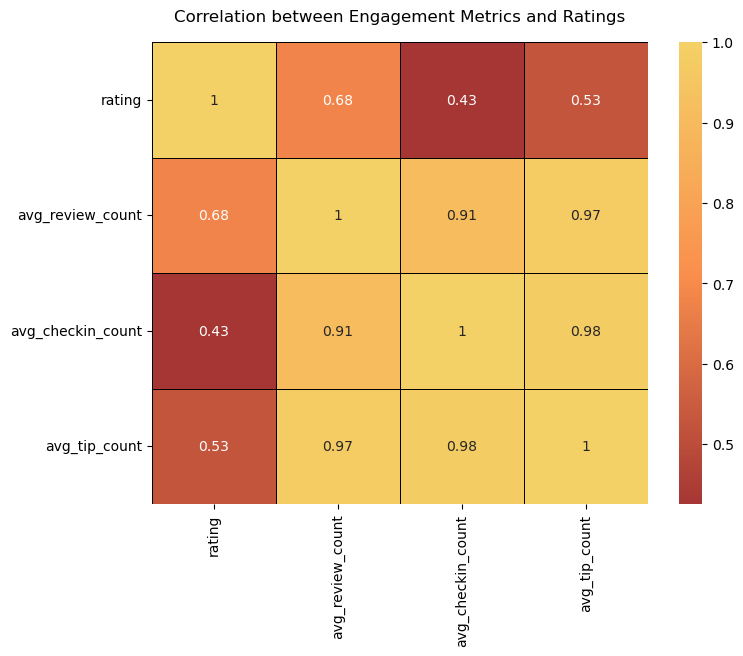

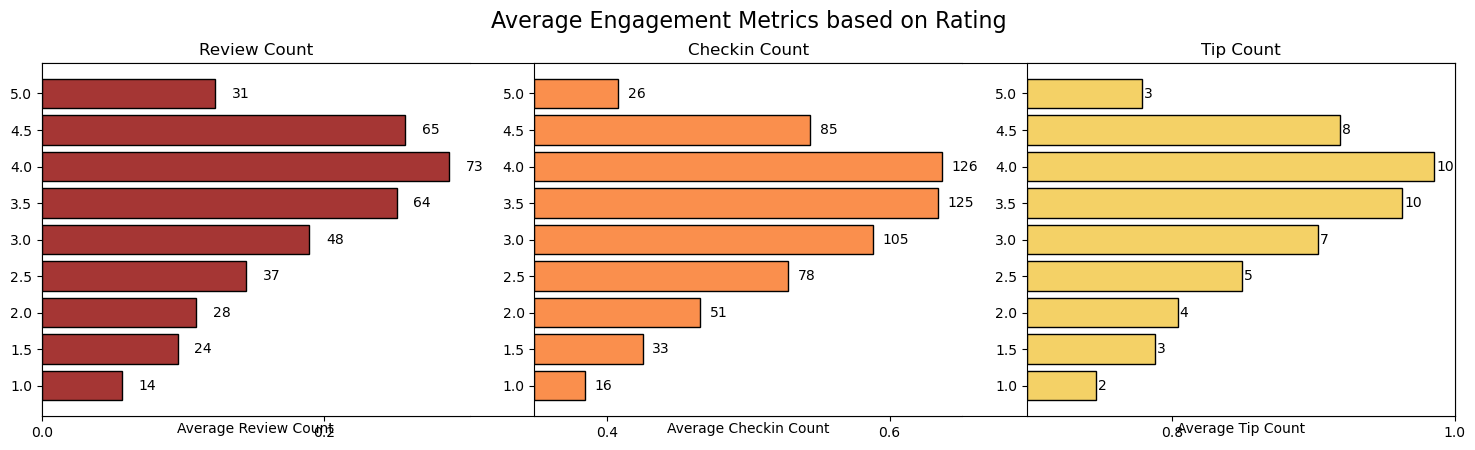

In [30]:
# Do restaurants with higher engagement (reviews, tips, check-ins) tend to have higher ratings?
review_count_df = pd.read_sql_query(f"""
SELECT total.avg_rating as rating,
       AVG(total.review_count) as avg_review_count,
       AVG(total.checkin_count) as avg_checkin_count,
       AVG(total.tip_count) as avg_tip_count
FROM (
    SELECT
        b.business_id,
        SUM(b.review_count) AS review_count,
        AVG(b.stars) AS avg_rating,
        SUM(LENGTH(COALESCE(cc.date, '')) - LENGTH(REPLACE(COALESCE(cc.date, ''), ',', '')) + 1) AS checkin_count,
        SUM(COALESCE(tip.tip_count, 0)) as tip_count
    FROM
        business b
    LEFT JOIN
        checkin cc ON b.business_id = cc.business_id
    LEFT JOIN
        (SELECT business_id, COUNT(business_id) as tip_count
         FROM tip 
         GROUP BY business_id 
         ORDER BY tip_count) as tip ON b.business_id = tip.business_id
    WHERE b.business_id IN {tuple(business_id['business_id'])}
    GROUP BY b.business_id
) as total
GROUP BY total.avg_rating
""", conn)

# Display the dataframe
display(review_count_df)

# Creating a custom color map for heatmap
colors = ['#a53634', "#fa8f4d", "#f4d166"]
custom_cmap = LinearSegmentedColormap.from_list("mycmap", colors)

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(review_count_df.corr(), cmap=custom_cmap, annot=True, linewidths=0.5, linecolor='black')
plt.title("Correlation between Engagement Metrics and Ratings", pad=15)
plt.show()

# Plotting the Bar charts for engagement metrics vs rating
plt.figure(figsize=(15,5))
plt.title('Average Engagement Metrics based on Rating\n', fontsize=16)
plt.yticks([])

# Bar chart for Review Count
plt.subplot(1, 3, 1)
plt.title('Review Count', fontsize=12)
plt.barh(review_count_df['rating'].astype(str), review_count_df['avg_review_count'], edgecolor='k', color='#a53634')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_review_count']):
    plt.text(value+3, i, str(round(value)), color='black', va='center')
plt.xlabel("Average Review Count", fontsize=10)
plt.xticks([])

# Bar chart for Checkin Count
plt.subplot(1, 3, 2)
plt.title('Checkin Count', fontsize=12)
plt.barh(review_count_df['rating'].astype(str), review_count_df['avg_checkin_count'], edgecolor='k', color='#fa8f4d')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_checkin_count']):
    plt.text(value+3, i, str(round(value)), color='black', va='center')
plt.xlabel("Average Checkin Count", fontsize=10)
plt.xticks([])

# Bar chart for Tip Count
plt.subplot(1, 3, 3)
plt.title('Tip Count', fontsize=12)
plt.barh(review_count_df['rating'].astype(str), review_count_df['avg_tip_count'], edgecolor='k', color='#f4d166')
for i, value in enumerate(review_count_df['avg_tip_count']):
    plt.text(value+0.05, i, str(round(value)), color='black', va='center')
plt.xlabel("Average Tip Count", fontsize=10)
plt.xticks([])

plt.tight_layout()
plt.show()


**Insights :**
* The data reveals a general upward trend in average review, check-in, and tip counts as ratings increase from 1 to 4 stars.
* Restaurants with a 4-star rating demonstrate the highest overall engagement across reviews, check-ins, and tips, suggesting that user interaction peaks at this rating.
* Interestingly, engagement metrics (reviews, check-ins, tips) begin to decline slightly at 4.5 stars and drop more significantly at the 5-star level.
* The dip in engagement at 5 stars may indicate a saturation point where fewer customers feel the need to provide additional feedback, or it could suggest that only a small, highly satisfied customer base frequents these top-rated establishments.

,business_id,review_count,avg_rating,checkin_count,tip_count,rating_category
15,Aw9Tldxcg5ifodzn0R2O6g,248,4.0,252,18,High-Rated
16,9iSoPNBV54dj6L0rxO4RWw,248,3.5,219,7,High-Rated
17,HI1zbZuujFH9yPBKP1GH6g,248,4.5,214,21,High-Rated
18,7dbUShu3yTUVNhTrdnF0FQ,248,4.0,166,16,High-Rated
19,y8gjlpJA89qDRCLC0JQaew,248,4.0,161,9,High-Rated
...,...,...,...,...,...,...
31532,ydpTeUOS3fvu3uP47s-_Nw,5,4.0,1,0,High-Rated
31533,yeJAs2OrnRRhsbywHPGMeQ,5,5.0,1,3,High-Rated
31534,z00F0RSAGimvSU9IrTevOw,5,1.0,1,1,Low-Rated
31535,z8of6nZcLMQhdiBnQ7fTkw,5,3.5,1,0,High-Rated


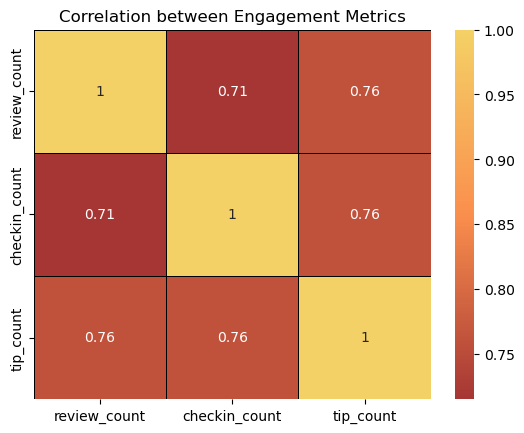

In [32]:
# Is there a correlation between the number of reviews, tips, and check-ins for a business?
engagement_df = pd.read_sql_query(f"""
SELECT
    b.business_id,
    SUM(b.review_count) AS review_count,
    AVG(b.stars) AS avg_rating,
    SUM(COALESCE(LENGTH(cc.date), 0) - COALESCE(LENGTH(REPLACE(cc.date, ',', '')), 0) + 1) AS checkin_count,
    SUM(COALESCE(tip.tip_count, 0)) AS tip_count,
    (CASE WHEN AVG(b.stars) >= 3.5 THEN 'High-Rated' ELSE 'Low-Rated' END) AS rating_category
FROM
    business b
LEFT JOIN
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN
    (SELECT business_id, COUNT(business_id) AS tip_count 
     FROM tip 
     GROUP BY business_id 
     ORDER BY tip_count) as tip ON b.business_id = tip.business_id
WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY b.business_id
ORDER BY review_count DESC, checkin_count DESC;
""", conn).dropna()

# Removing outliers for checkin_count using a custom remove_outliers function
engagement_df = remove_outliers(engagement_df, 'checkin_count')

# Display the dataframe
display(engagement_df)

# Heatmap to show correlation between review_count, checkin_count, and tip_count
sns.heatmap(engagement_df[['review_count', 'checkin_count', 'tip_count']].corr(), 
            cmap=custom_cmap, annot=True, linewidths=0.5, linecolor='black')
plt.title('Correlation between Engagement Metrics')
plt.show()


**Insights :**
* The dataset shows a strong positive correlation among review counts, check-in counts, and tip counts.
* 
Engagement metrics (reviews, check-ins, tips) are closely linked, with high interaction in one area leading to more in others.

,review_count,checkin_count,tip_count
rating_category,,,
High-Rated,55.245495,67.096287,6.774642
Low-Rated,32.268942,53.057933,4.449875


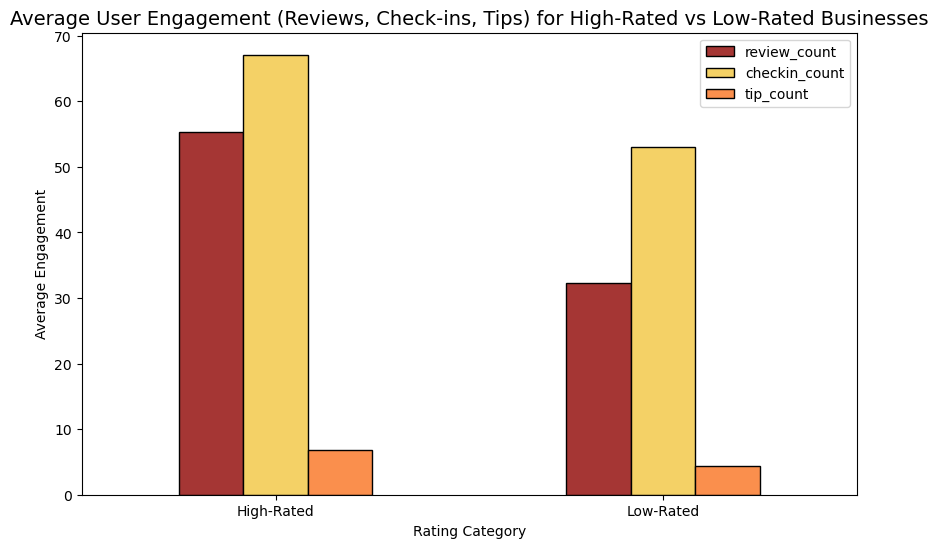

In [46]:
# Is there a difference in the user engagement (reviews, tips, and check-ins) between high-rated and low-rated businesses?
# Calculate the mean engagement by rating category
mean_engagement = engagement_df.groupby('rating_category')[['review_count', 'checkin_count', 'tip_count']].mean()
display(mean_engagement)

# Plotting the engagement differences between high-rated and low-rated businesses
mean_engagement.plot(kind='bar', figsize=(10,6), color=['#a53634', '#f4d166', '#fa8f4d'], edgecolor='black')
plt.title('Average User Engagement (Reviews, Check-ins, Tips) for High-Rated vs Low-Rated Businesses', fontsize=14)
plt.xlabel('Rating Category')
plt.ylabel('Average Engagement')
plt.xticks(rotation=0)
plt.show()


**Insights :**
* High-rated businesses consistently show higher user engagement across all metrics (reviews, check-ins, tips) compared to low-rated businesses.
* The difference is most significant in check-ins, where high-rated businesses have a noticeably greater volume of check-in activity.
* Reviews and tips also follow the same trend, with high-rated businesses receiving more interaction from  user.
* These findings suggest that higher customer satisfaction, reflected in ratings, is associated with greater user engagement across various platforms.
* Businesses should focus on strategies that boost all types of user engagement, as increases in one type of engagement are likely to drive increases in others, enhancing overall visibility and interaction with customers.

,business_id,star_rating,parking,alcohol,happy_hour,has_tv,noise_level,smoking,open_24_hours
0,MTSW4McQd7CbVtyjqoe9mw,4.0,1,1,0,0,0,0,0
1,CF33F8-E6oudUQ46HnavjQ,2.0,1,1,1,1,0,0,0
2,bBDDEgkFA1Otx9Lfe7BZUQ,1.5,1,1,1,1,0,0,0
3,eEOYSgkmpB90uNA7lDOMRA,4.0,1,1,0,0,0,0,0
4,il_Ro8jwPlHresjw9EGmBg,2.5,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
31532,sf_oQ62L8UEnOOLf00nNGA,3.0,1,0,0,0,0,0,0
31533,l9eLGG9ZKpLJzboZq-9LRQ,3.0,1,0,0,0,0,0,0
31534,cM6V90ExQD6KMSU3rRB5ZA,4.0,1,1,0,1,1,0,0
31535,WnT9NIzQgLlILjPT0kEcsQ,4.5,1,1,1,1,0,0,0


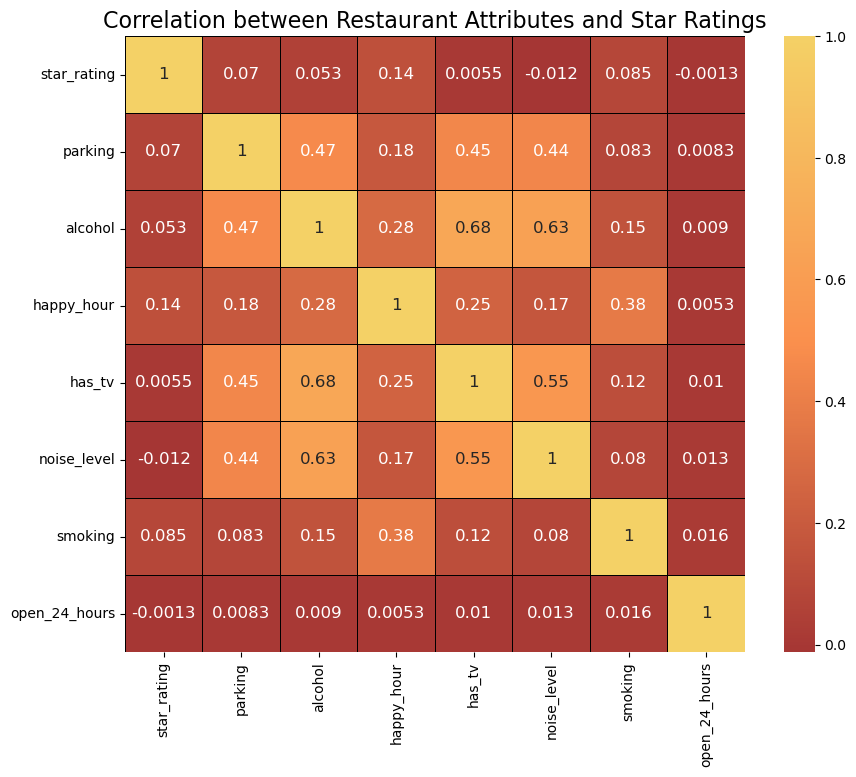

<Figure size 1600x1200 with 0 Axes>

In [135]:
#How do restaurant attributes like parking, alcohol, happy hour, TV availability, noise level, smoking, and 24-hour availability correlate with star ratings?
attributes_df = pd.read_sql_query(f"""
SELECT 
    b.business_id,
    b.stars AS star_rating,
    json_extract(b.attributes, '$.BusinessParking') IS NOT NULL AS parking,
    json_extract(b.attributes, '$.Alcohol') IS NOT NULL AS alcohol,
    json_extract(b.attributes, '$.HappyHour') IS NOT NULL AS happy_hour,
    json_extract(b.attributes, '$.HasTV') IS NOT NULL AS has_tv,
    json_extract(b.attributes, '$.NoiseLevel') IS NOT NULL AS noise_level,
    json_extract(b.attributes, '$.Smoking') IS NOT NULL AS smoking,
    json_extract(b.attributes, '$.Open24Hours') IS NOT NULL AS open_24_hours
FROM business b
WHERE b.business_id IN {tuple(business_id['business_id'])};
""", conn)

# Display the extracted attributes dataframe
display(attributes_df)

# Calculate correlation between the attributes and star ratings
corr_df = attributes_df[['star_rating', 'parking', 'alcohol', 'happy_hour', 'has_tv', 'noise_level', 'smoking', 'open_24_hours']].corr()


# Set a larger figure size and increase font size for better readability
plt.figure(figsize=(10, 8))  # Increase the figure size
# Create a custom colormap using the specified colors
colors = ['#a53634', '#fa8f4d','#f4d166']
custom_cmap = LinearSegmentedColormap.from_list("mycmap", colors)

sns.heatmap(corr_df, cmap=custom_cmap, annot=True, annot_kws={"size": 12}, linewidths=0.5, linecolor='black')

# Set the title with larger font size
plt.title('Correlation between Restaurant Attributes and Star Ratings', fontsize=16)

# Display the heatmap
plt.show()

**Insights :**
* Alcohol availability and happy hour offerings have a moderate positive correlation with star ratings, indicating that these amenities tend to increase customer satisfaction and receive slightly higher ratings.
* Parking and TV availability have weaker correlations with star ratings, showing a less pronounced effect on customer satisfaction.
* Noise level, smoking policies, and 24-hour availability show little to no influence on star ratings.
* Focusing on enhancing amenities like alcohol and happy hour can significantly boost customer satisfaction, while other features may not have a strong impact on ratings.
* 
Overall, businesses should consider focusing on alcohol service and happy hour promotions as these factors appear to have the greatest positive influence on customer ratings, while amenities like TVs and 24-hour availability may not significantly boost ratings.

In [38]:
# function to calculate the success score based on the avg rating and total review count
def calculate_success_metric(df):
    success_score = []
    for index, row in df.iterrows():
        score = row['avg_rating'] * np.log(row['review_count'] + 1)
        success_score.append(score)
    return success_score

In [39]:
# How do the success metrics (review_count or avg_rating) of restaurants vary across different states and cities?

city_df = pd.read_sql_query(f"""SELECT state,city, latitude, longitude, AVG(stars) AS avg_rating, SUM(review_count) as review_count,
COUNT(*) as restaurant_count
FROM business
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY state, city
ORDER BY review_count DESC 
limit 10;""",conn)


city_df['success_score'] = calculate_success_metric(city_df)
display(city_df)
# Create a base map
m = folium.Map(location=[city_df['latitude'].mean(), city_df['longitude'].mean()], zoom_start=4)

# Define a color scale
color_scale = folium.LinearColormap(colors=['green', 'yellow', '#E54F29'],
                                     vmin=city_df['success_score'].min(),
                                     vmax=city_df['success_score'].max())

# Add markers to the map
for index, row in city_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color_scale(row['success_score']),
        fill=True,
        fill_color=color_scale(row['success_score']),
        fill_opacity=0.7,
        popup=f"Success Score: {row['success_score']}"
    ).add_to(m)

# Add color scale to the map
m.add_child(color_scale)



,state,city,latitude,longitude,avg_rating,review_count,restaurant_count,success_score
0,PA,Philadelphia,39.955505,-75.155564,3.532156,175487,3001,42.651934
1,FL,Tampa,27.890814,-82.502346,3.571429,104376,1715,41.270588
2,IN,Indianapolis,39.637133,-86.127217,3.412111,92639,1701,39.022521
3,AZ,Tucson,32.338572,-111.010760,3.386187,91613,1419,38.688341
4,TN,Nashville,36.208102,-86.768170,3.493590,87070,1404,39.737764
5,LA,New Orleans,29.963974,-90.042604,3.693676,69239,1012,41.167252
6,MO,Saint Louis,38.583223,-90.407187,3.414303,51490,811,37.042331
7,NV,Reno,39.476518,-119.784037,3.479626,48393,589,37.535187
8,AB,Edmonton,53.436403,-113.604288,3.509379,45916,1546,37.671748
9,ID,Boise,43.611192,-116.206275,3.558824,36104,561,37.346958


**Insights :**
* Philadelphia emerges as the top city with the highest success score, indicating a combination of high ratings and active user engagement.
* Following Philadelphia, Tampa, Indianapolis, and Tucson rank among the top cities with significant success scores, suggesting thriving restaurant scenes in these areas.
* The success metrics vary significantly across different states and cities, highlighting regional differences in dining preferences, culinary scenes, and customer engagement levels.
* Identifying cities with high success scores presents opportunities for restaurant chains to expand or invest further, while areas with lower scores may require targeted efforts to improve ratings and increase user engagement.

,city,state,restaurant_count
0,Philadelphia,PA,3001
1,Tampa,FL,1715
2,Indianapolis,IN,1701
3,Edmonton,AB,1546
4,Tucson,AZ,1419
5,Nashville,TN,1404
6,New Orleans,LA,1012
7,Saint Louis,MO,811
8,Reno,NV,589
9,Boise,ID,561


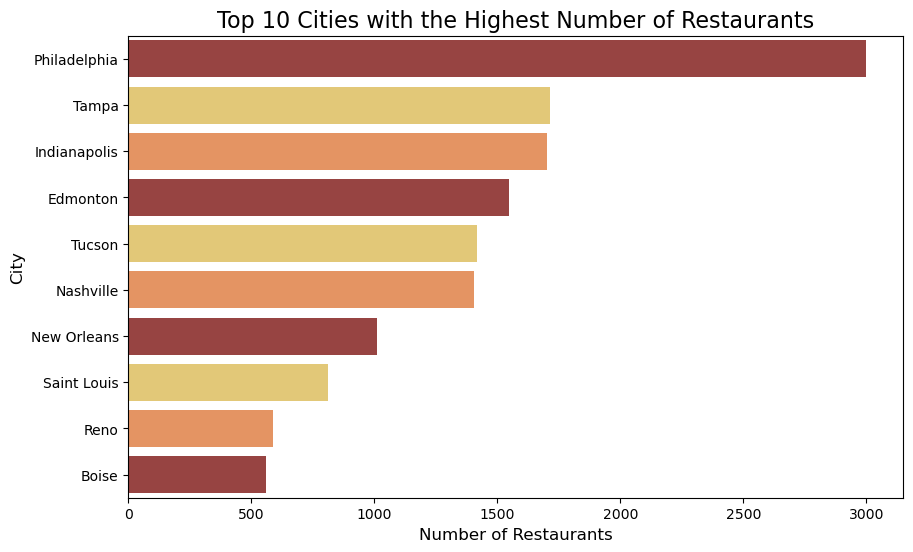

In [146]:
#Which cities have the highest number of restaurants, and how does restaurant distribution compare across city areas?
city_restaurant_df = pd.read_sql_query(f"""
SELECT 
    city, 
    state,
    COUNT(*) AS restaurant_count
FROM business
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY city, state
ORDER BY restaurant_count DESC
LIMIT 10;  -- You can increase this number if you want more cities
""", conn)

# Display the dataframe with the top cities
display(city_restaurant_df)

# Plot the top cities with the highest number of restaurants
plt.figure(figsize=(10, 6))

colors = ['#a53634', '#f4d166', '#fa8f4d']
sns.barplot(x='restaurant_count', y='city', data=city_restaurant_df, palette=colors)

plt.title('Top 10 Cities with the Highest Number of Restaurants', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

plt.savefig("yelp_city", dpi = 300)

**Insights :**
* Philadelphia stands out with a strong restaurant presence, signaling a thriving food culture and opportunities for food-related tourism and local business growth.
* Cities like Tampa and Indianapolis show competitive dining markets, attracting both locals and tourists.
* Edmonton highlights a strong restaurant scene in Canada, reflecting cultural diversity and economic growth.
* Tucson, Nashville, and New Orleans have vibrant food scenes, driving local economies and attracting food enthusiasts and supporting local economies.
* Smaller cities such as Reno and Boise demonstrate emerging restaurant markets, catering to growing populations and regional tourism.


,city,state,categories,avg_rating,restaurant_count
0,Philadelphia,PA,"Restaurants, Pizza",2.981481,108
1,Philadelphia,PA,"Pizza, Restaurants",2.947368,76
2,Philadelphia,PA,"Restaurants, Chinese",3.358333,60
3,Philadelphia,PA,"Chinese, Restaurants",3.250000,60
4,Tucson,AZ,"Restaurants, Mexican",3.364583,48
5,Tucson,AZ,"Mexican, Restaurants",3.369048,42
6,Indianapolis,IN,"Restaurants, Mexican",3.912500,40
7,Saint Louis,MO,"Chinese, Restaurants",3.525000,40
8,Indianapolis,IN,"Restaurants, Pizza",3.200000,35
9,Indianapolis,IN,"Pizza, Restaurants",2.833333,33


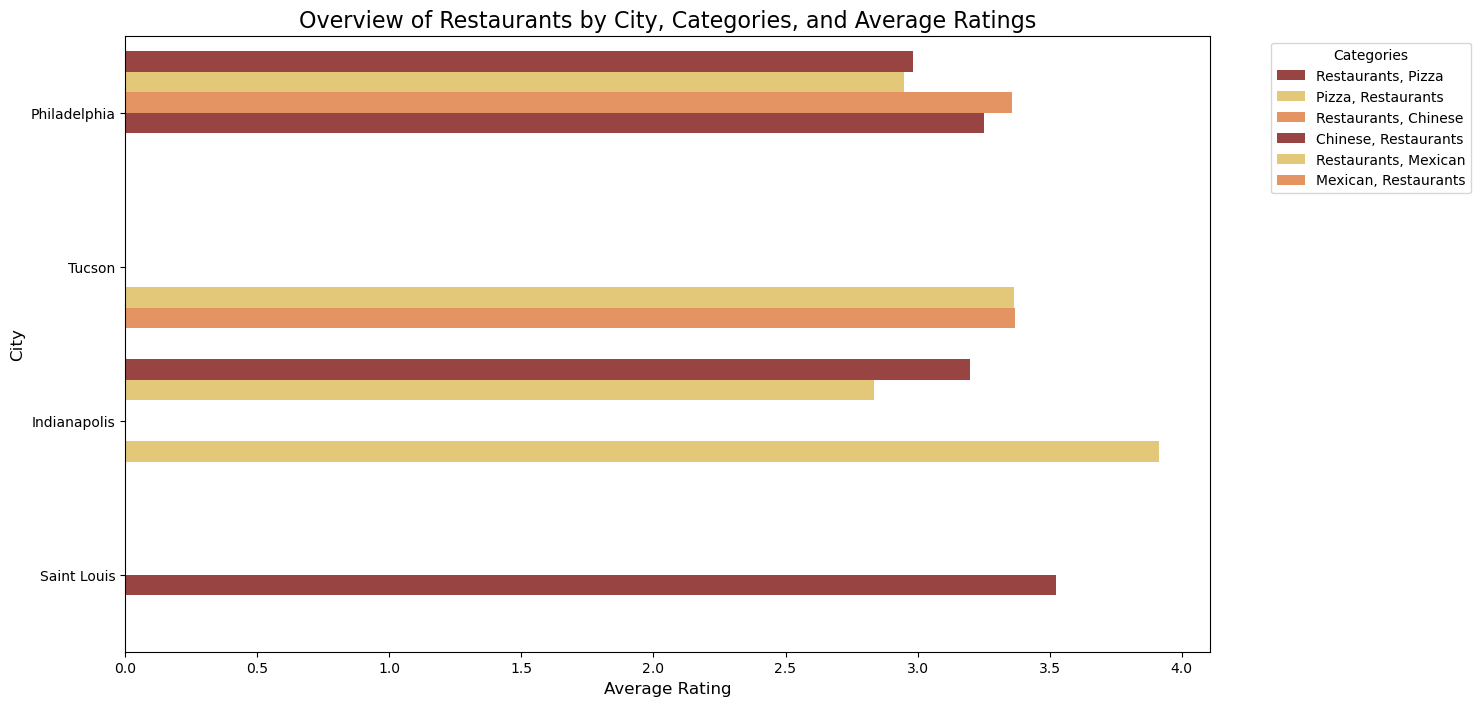

In [43]:
#Provide an overview of restaurants in different cities, including categories and ratings.
city_overview_df = pd.read_sql_query(f"""
SELECT 
    city, 
    state,
    categories,
    AVG(stars) AS avg_rating,
    COUNT(*) AS restaurant_count
FROM business
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY city, state, categories
ORDER BY restaurant_count DESC, avg_rating DESC
LIMIT 10;  -- You can increase this limit if you want more cities and categories
""", conn)

# Display the dataframe with an overview of restaurants by city
display(city_overview_df)


# Plot restaurant overview by city and categories
plt.figure(figsize=(14, 8))
colors = ['#a53634', '#f4d166', '#fa8f4d']
sns.barplot(x='avg_rating', y='city', hue='categories', data=city_overview_df, palette=colors)

plt.title('Overview of Restaurants by City, Categories, and Average Ratings', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Insights :**
* Philadelphia shows a diverse range of restaurant categories, with pizza and Chinese cuisine making up a significant portion, but with lower average ratings.
* Tucson and Indianapolis have higher average ratings, particularly for Mexican cuisine, suggesting strong customer satisfaction in these categories.
* The variation in restaurant categories and ratings across cities highlights regional preferences and areas for potential improvement, especially in cities with lower average ratings like Philadelphia.

,elite,row_count,total_review_count
0,Elite,91198,20484441
1,Not Elite,1896699,26021235


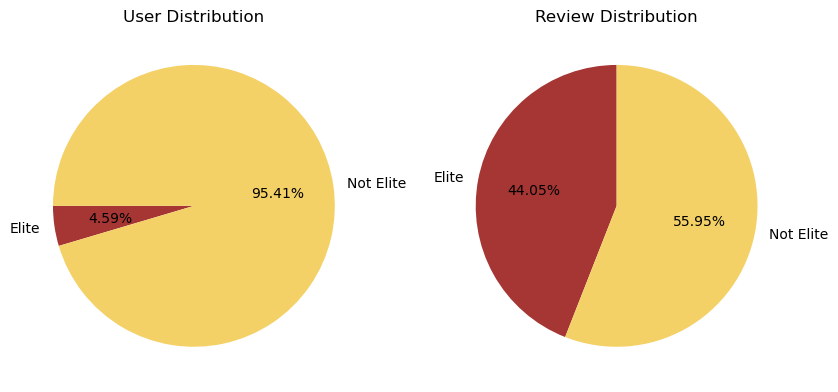

In [149]:
# Is there any difference in engagement of elite users and non elite users?
elite_df = pd.read_sql_query("""SELECT
    elite,
    COUNT(*) AS row_count,
    SUM(review_count) AS total_review_count
FROM
    (SELECT
        CASE
            WHEN elite = '' THEN 'Not Elite'
            ELSE 'Elite'
        END AS elite,
        u.review_count
    FROM
        user u) AS user_elite
GROUP BY
    elite;
""",conn)
display(elite_df)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('User Distribution')
plt.pie(elite_df['row_count'], labels = elite_df['elite'], autopct=lambda p: '{:.2f}%'.format(p), startangle = 180, colors = ['#a53634','#f4d166'])

# Review Distribution Pie Chart
plt.subplot(1,2,2)
plt.title('Review Distribution')
plt.pie(elite_df['total_review_count'], labels = elite_df['elite'], autopct=lambda p: '{:.2f}%'.format(p), startangle = 90, colors = ['#a53634',  '#f4d166'])

plt.show()


**Insights :**
* Elite users are individuals who have been recognized and awarded the "Elite" status by Yelp for their active and high-quality contributions to the platform, such as frequent and detailed reviews, photos, and check-ins, among other criteria.
* Elite users, despite being significantly fewer in number, contribute a substantial proportion of the total review count compared to non-elite users.
* Elite users often provide detailed and insightful reviews, which can influence other users' perceptions and decisions regarding a business.
* Reviews from elite users may receive more attention and visibility on the Yelp platform due to their status, potentially leading to higher exposure for businesses.
* Establishing a positive relationship with elite users can lead to repeat visits and loyalty, as they are more likely to continue supporting businesses they have had good experiences with.

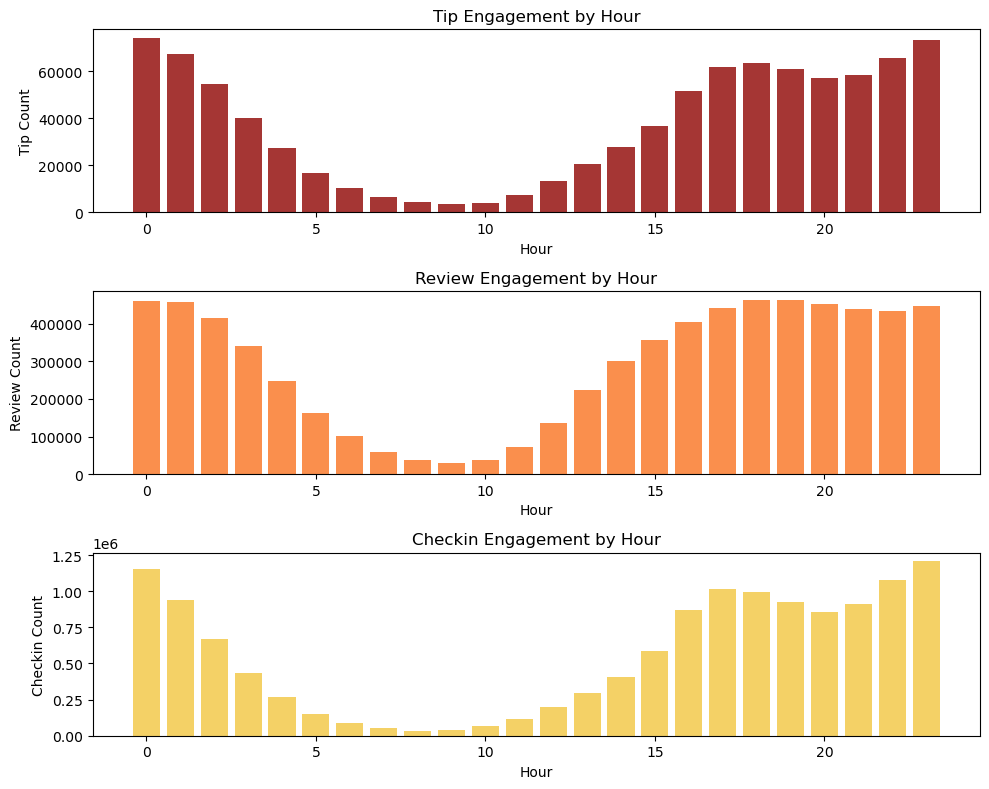

In [50]:
# What are the busiest hours for restaurants?
# Query to get review engagement by hour
review_engagement = pd.read_sql_query("""
SELECT
  cast (strftime('%H', date) as integer) as hour,
  COUNT(*) AS review_count
FROM
  review
GROUP BY
  hour;
""", conn)

# Query to get tip engagement by hour
tip_engagement = pd.read_sql_query("""
SELECT
  cast (strftime('%H', date) as integer) as hour,
  COUNT(*) AS tip_count
FROM
  tip
GROUP BY
  hour;
""", conn)

# Query and parsing for check-in engagement by hour
checkin = pd.read_sql_query("""SELECT date FROM checkin""", conn)
checkin_engagement = []
for i in checkin['date']:
    checkin_engagement.extend([datetime.strptime(j.strip(), "%Y-%m-%d %H:%M:%S").strftime("%H") for j in i.split(',')])

# Group check-in engagement by hour
checkin_engagement = pd.DataFrame(checkin_engagement).astype('int').groupby(0)[0].count()

# Plotting the engagement data
plt.figure(figsize=(10, 8))

# Tip Engagement
plt.subplot(3, 1, 1)
plt.title('Tip Engagement by Hour')
plt.bar(tip_engagement['hour'], tip_engagement['tip_count'], color='#a53634')
plt.xlabel('Hour')
plt.ylabel('Tip Count')

# Review Engagement
plt.subplot(3, 1, 2)
plt.title('Review Engagement by Hour')
plt.bar(review_engagement['hour'], review_engagement['review_count'], color='#fa8f4d')
plt.xlabel('Hour')
plt.ylabel('Review Count')

# Checkin Engagement
plt.subplot(3, 1, 3)
plt.title('Checkin Engagement by Hour')
plt.bar(checkin_engagement.index, checkin_engagement.values, color='#f4d166')
plt.xlabel('Hour')
plt.ylabel('Checkin Count')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**Insights :**
* The busiest hours for restaurants, based
on user engagement, span from 4 pm to 1
am.
* Knowing the peak hours allows businesses
to optimize their staffing levels and
resource allocation during these times to
ensure efficient operations and quality
service delivery.
* User engagement is concentrated during evening and night hours, indicating higher demand for dining out during these times, possibly influenced by work schedules, social gatherings, and leisure activities.


,user_id,tip_count,review_count,engagement_type
2,--2eQbUFyRvXKgc-AEZXmw,3,1,More Tips
11,--8PLeQOnEjuxbAi25lSCQ,3,2,More Tips
19,--Dmzak2fNq8DdXEy1vLrg,2,1,More Tips
28,--KsuCSkGGvDKTbdK9NvIg,42,32,More Tips
33,--Rm-VyYWgHA7ZpljAMlvg,2,1,More Tips
...,...,...,...,...
301682,zz6FoHLnNBCtwJYgWI8XjQ,21,2,More Tips
301707,zzRTOuvkNQP9ZkFfVPl5_A,2,1,More Tips
301710,zzT0pSbiaNAPL171kwnvjA,5,4,More Tips
301724,zza-gQ2jzjAAJkalUHuO6Q,9,4,More Tips


Number of users who left tips to more businesses than reviews: 27278


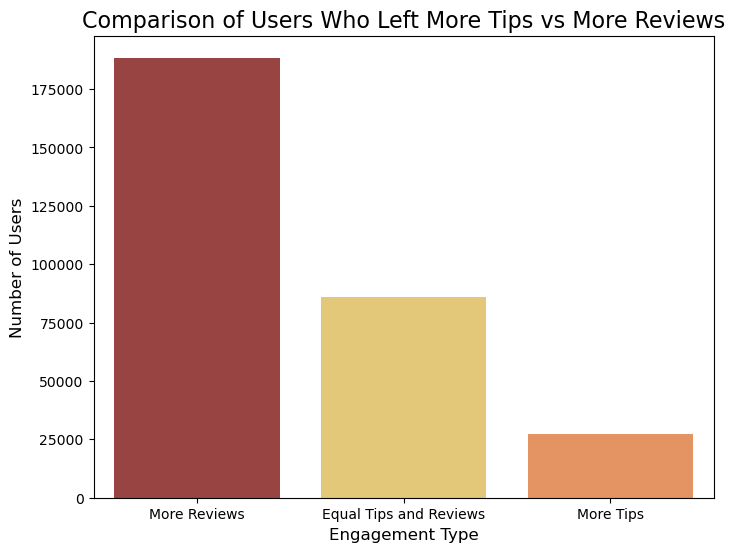

In [51]:
#How many users have left tips to more businesses than reviews, and how does user engagement vary between leaving tips and reviews?
import matplotlib.pyplot as plt
import seaborn as sns

# SQL query to get all users and their tip and review counts
user_engagement_df = pd.read_sql_query(f"""
WITH tips_per_user AS (
    SELECT 
        user_id,
        COUNT(DISTINCT business_id) AS tip_count
    FROM tip
    GROUP BY user_id
),
reviews_per_user AS (
    SELECT 
        user_id,
        COUNT(DISTINCT business_id) AS review_count
    FROM review
    GROUP BY user_id
)
SELECT 
    tips_per_user.user_id,
    tips_per_user.tip_count,
    COALESCE(reviews_per_user.review_count, 0) AS review_count  -- Handle missing values in reviews
FROM 
    tips_per_user
LEFT JOIN 
    reviews_per_user
ON 
    tips_per_user.user_id = reviews_per_user.user_id;
""", conn)

# Categorize users into different groups: More Tips, More Reviews, Equal Tips and Reviews
user_engagement_df['engagement_type'] = user_engagement_df.apply(
    lambda row: 'More Tips' if row['tip_count'] > row['review_count'] else 
                'More Reviews' if row['review_count'] > row['tip_count'] else 'Equal Tips and Reviews',
    axis=1
)

# Display the dataframe with users who left tips to more businesses than reviews
users_with_more_tips_than_reviews = user_engagement_df[user_engagement_df['engagement_type'] == 'More Tips']
display(users_with_more_tips_than_reviews)

# Count how many users meet the condition of "More Tips"
more_tips_count = len(users_with_more_tips_than_reviews)
print(f"Number of users who left tips to more businesses than reviews: {more_tips_count}")

# Count users in each group (More Tips, More Reviews, Equal Tips and Reviews)
engagement_counts = user_engagement_df['engagement_type'].value_counts()

# Plot the engagement types to visualize comparison
plt.figure(figsize=(8, 6))
colors = ['#a53634', '#f4d166', '#fa8f4d']
sns.barplot(x=engagement_counts.index, y=engagement_counts.values, palette=colors)

plt.title('Comparison of Users Who Left More Tips vs More Reviews', fontsize=16)
plt.xlabel('Engagement Type', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.show()


**Insights :**
* Most users are more likely to leave reviews than tips, indicating that reviews are the preferred form of engagement.
* A smaller but significant group of users engages equally in leaving both tips and reviews, showing a balanced interaction.
* Few users prioritize leaving tips over reviews, suggesting that tips are less common but may still offer valuable insights for businesses.
* Businesses should focus more on encouraging reviews while also recognizing the value of tips as a form of user engagement.

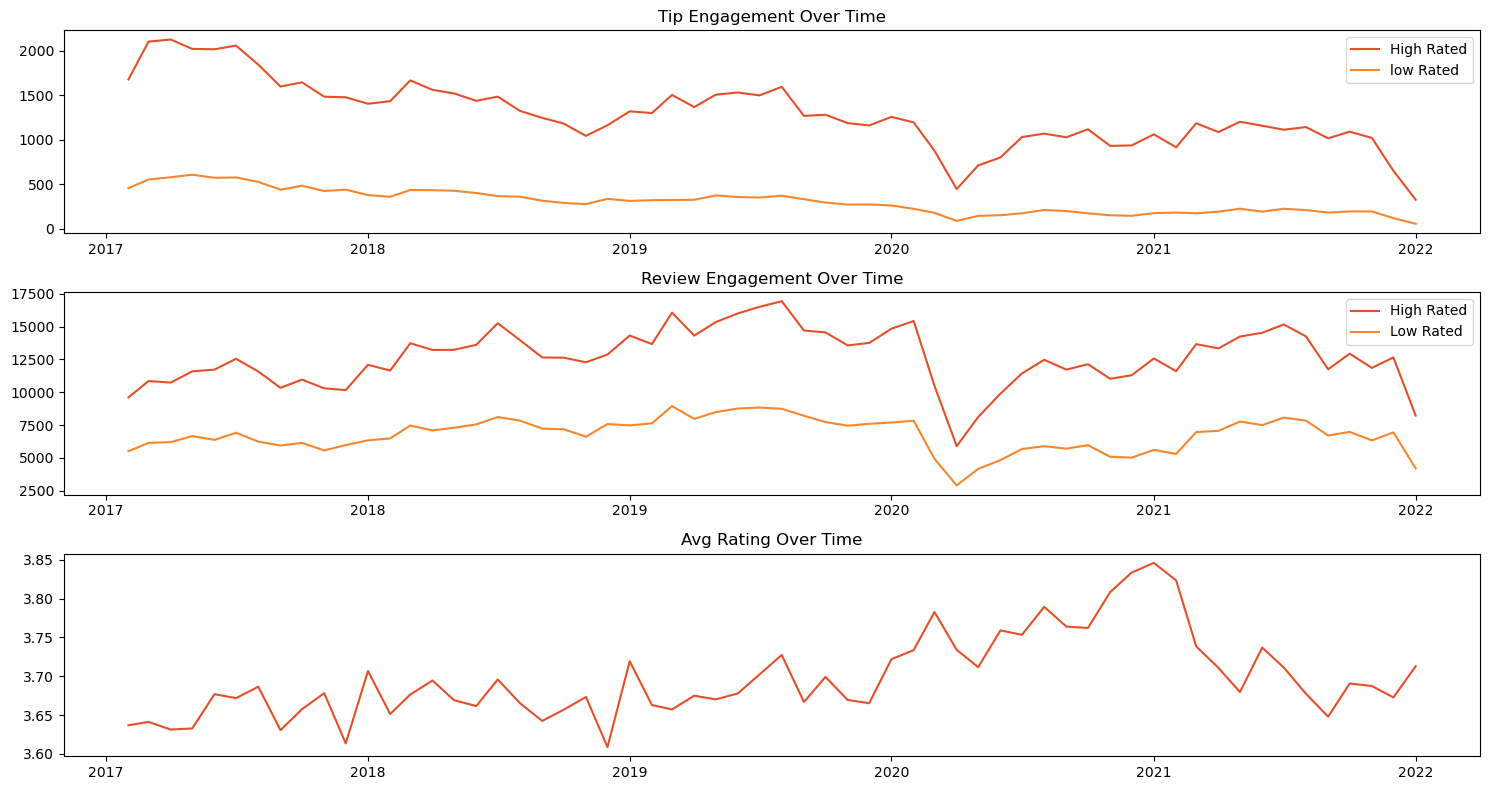

In [52]:
# Are there any patterns in user engagement over time for successful businesses compared to less successful ones?
# Are there any seasonal trends in the user engagement for restaurants?

high_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count FROM
(SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
FROM review
WHERE business_id IN {tuple(business_id['business_id'])} and stars >= 3.5
GROUP BY month_year
ORDER BY month_year) as review
JOIN 
(SELECT AVG(b.stars), strftime('%m-%Y', tip.date) AS month_year, COUNT(*) AS tip_count
FROM tip
JOIN business as b
on tip.business_id = b.business_id
WHERE tip.business_id IN {tuple(business_id['business_id'])} and b.stars >= 3.5
GROUP BY month_year
ORDER BY month_year) as tip

on review.month_year = tip.month_year
;""",conn)

low_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count FROM
(SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
FROM review
WHERE business_id IN {tuple(business_id['business_id'])} and stars < 3.5
GROUP BY month_year
ORDER BY month_year) as review
JOIN 
(SELECT AVG(b.stars), strftime('%m-%Y', tip.date) AS month_year, COUNT(*) AS tip_count
FROM tip
JOIN business as b
on tip.business_id = b.business_id
WHERE tip.business_id IN {tuple(business_id['business_id'])} and b.stars < 3.5
GROUP BY month_year
ORDER BY month_year) as tip

on review.month_year = tip.month_year
;""",conn)

time_rating = pd.read_sql_query(f"""SELECT strftime('%m-%Y', date) AS month_year, AVG(stars) as avg_rating
FROM review
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY month_year
ORDER BY month_year
;""",conn)
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year',inplace = True)
time_rating = time_rating[time_rating['month_year']>'2017']

high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'])
high_rated_engagement.sort_values('month_year',inplace = True)
high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year']>'2017']

low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])
low_rated_engagement.sort_values('month_year',inplace = True)
low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year']>'2017']
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

plt.figure(figsize = (15,8))
plt.subplot(3,1,1)
plt.title('Tip Engagement Over Time')
plt.plot(high_rated_engagement['month_year'],high_rated_engagement['tip_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'],low_rated_engagement['tip_count'], label = 'low Rated',color = '#F8862C')
plt.legend()
plt.subplot(3,1,2)
plt.title('Review Engagement Over Time')
plt.plot(high_rated_engagement['month_year'],high_rated_engagement['review_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'],low_rated_engagement['review_count'],  label = 'Low Rated', color = '#F8862C')
plt.legend()
plt.subplot(3,1,3)
plt.title('Avg Rating Over Time')
plt.plot(time_rating['month_year'],time_rating['avg_rating'], color = '#E54F29')
plt.tight_layout()
plt.show()

**Insights :**
* High-rated businesses consistently show higher tip engagement compared to low-rated businesses over time.
* Review engagement is significantly higher for high-rated businesses, indicating a correlation between higher ratings and increased user interaction
* Average rating trends show a general increase from 2017 to 2021, with a noticeable decline around 2021, possibly due to external factor
* High-rated businesses maintain more consistent and elevated engagement across both reviews and tips over time, highlighting the importance of sustained customer satisfaction.


In [53]:
tip_high_rated = high_rated_engagement[['month_year','tip_count']].set_index('month_year')
review_high_rated = high_rated_engagement[['month_year','review_count']].set_index('month_year')
rating_df = time_rating[['month_year','avg_rating']].set_index('month_year')

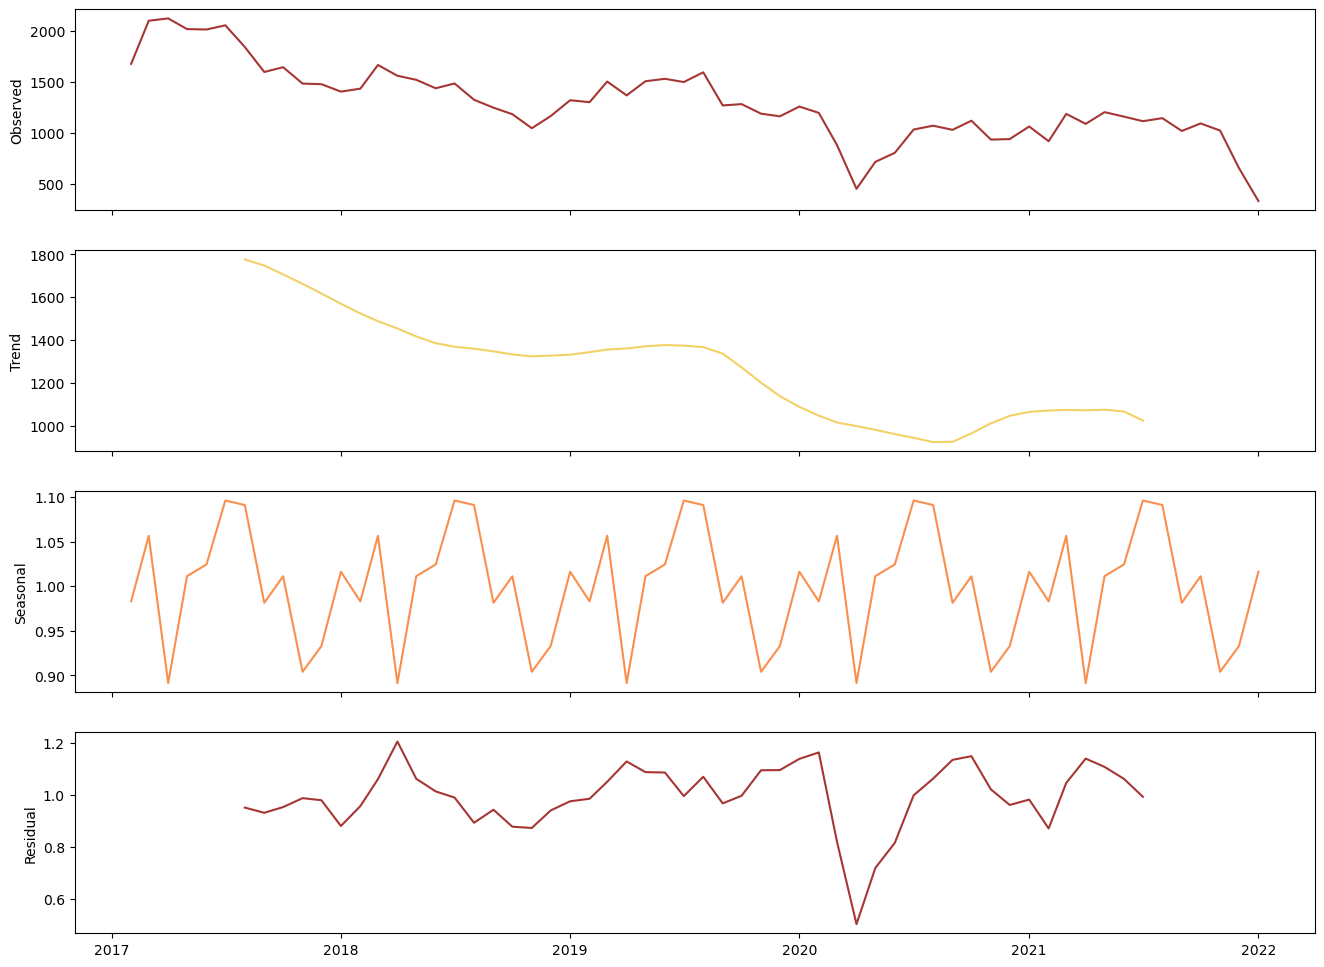

In [151]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
multiplicative_decomposition = seasonal_decompose(tip_high_rated, 
                                                  model='multiplicative', period=12)

# Update figure size
plt.rcParams.update({'figure.figsize': (16, 12)})

# Create subplots manually and apply colors to each component
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)

# Observed
ax1.plot(multiplicative_decomposition.observed, color='#a53634')
ax1.set_ylabel('Observed')

# Trend
ax2.plot(multiplicative_decomposition.trend, color='#f4d166')
ax2.set_ylabel('Trend')

# Seasonal
ax3.plot(multiplicative_decomposition.seasonal, color='#fa8f4d')
ax3.set_ylabel('Seasonal')

# Residual
ax4.plot(multiplicative_decomposition.resid, color='#a53634')
ax4.set_ylabel('Residual')

plt.show()

**Insights :**
* Trend: There is a noticeable decline in the overall tip engagement trend over time for high-rated businesses, with a slight recovery towards the end.
* Seasonality: Clear seasonal patterns are observed, with regular fluctuations in tip engagement, indicating consistent periodic changes across the year.
* Residual: The residuals show moderate variability, suggesting that while the model captures the main trends and seasonality, some unpredictable factors still impact engagement levels.

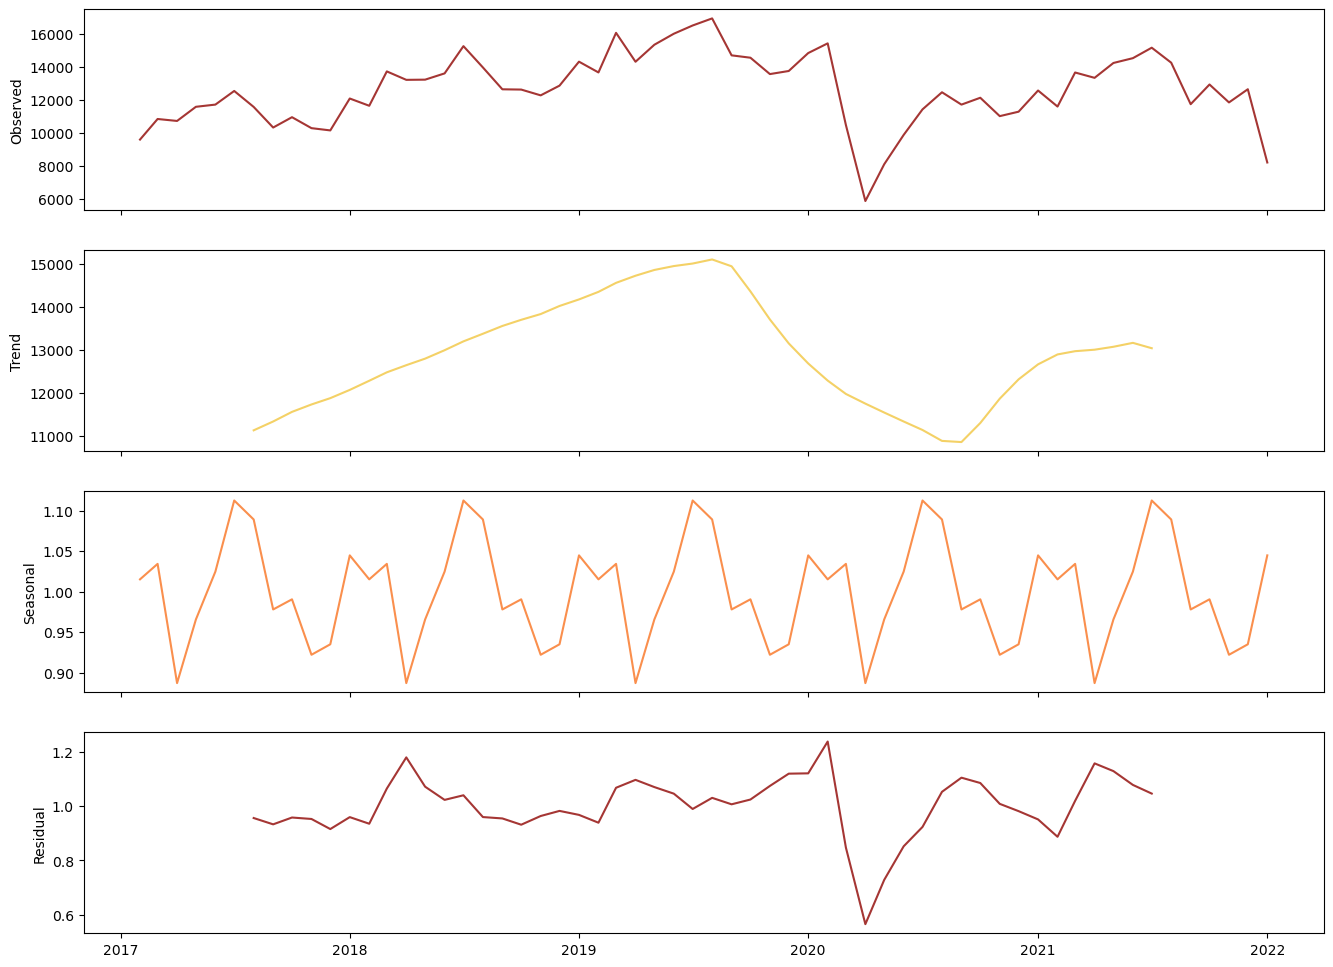

In [153]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
multiplicative_decomposition = seasonal_decompose(review_high_rated, 
                                                  model='multiplicative', period=12)

# Update figure size
plt.rcParams.update({'figure.figsize': (16, 12)})

# Create subplots manually and apply colors to each component
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)

# Observed
ax1.plot(multiplicative_decomposition.observed, color='#a53634')
ax1.set_ylabel('Observed')

# Trend
ax2.plot(multiplicative_decomposition.trend, color='#f4d166')
ax2.set_ylabel('Trend')

# Seasonal
ax3.plot(multiplicative_decomposition.seasonal, color='#fa8f4d')
ax3.set_ylabel('Seasonal')

# Residual
ax4.plot(multiplicative_decomposition.resid, color='#a53634')
ax4.set_ylabel('Residual')

plt.show()


**Insights :**
* Trend: The overall review engagement for high-rated businesses shows a steady upward trend over time, with a slight dip around 2020 followed by a recovery.* Seasonality: There are clear seasonal patterns in review engagement, with periodic peaks and troughs observed consistently across years.
* 
Residual: The residuals display moderate variability, indicating that while the main trends and seasonal patterns are captured, there are some external factors affecting review engagement.

**Overall Insights :**
* Successful businesses, especially those with higher ratings (above 3.5), demonstrate consistent or increasing user engagement over time.
* High-rated restaurants maintain a steady or growing level of user interaction, indicating strong customer interest and satisfaction
* 
Tip engagement shows a declining trend, while review engagement follows an upward trajectory, suggesting a shift in how customers interact over tim
*
Seasonal trends are evident, with peak engagement occurring at the beginning and end of the year (around November to March), highlighting key periods for increased customer activity.

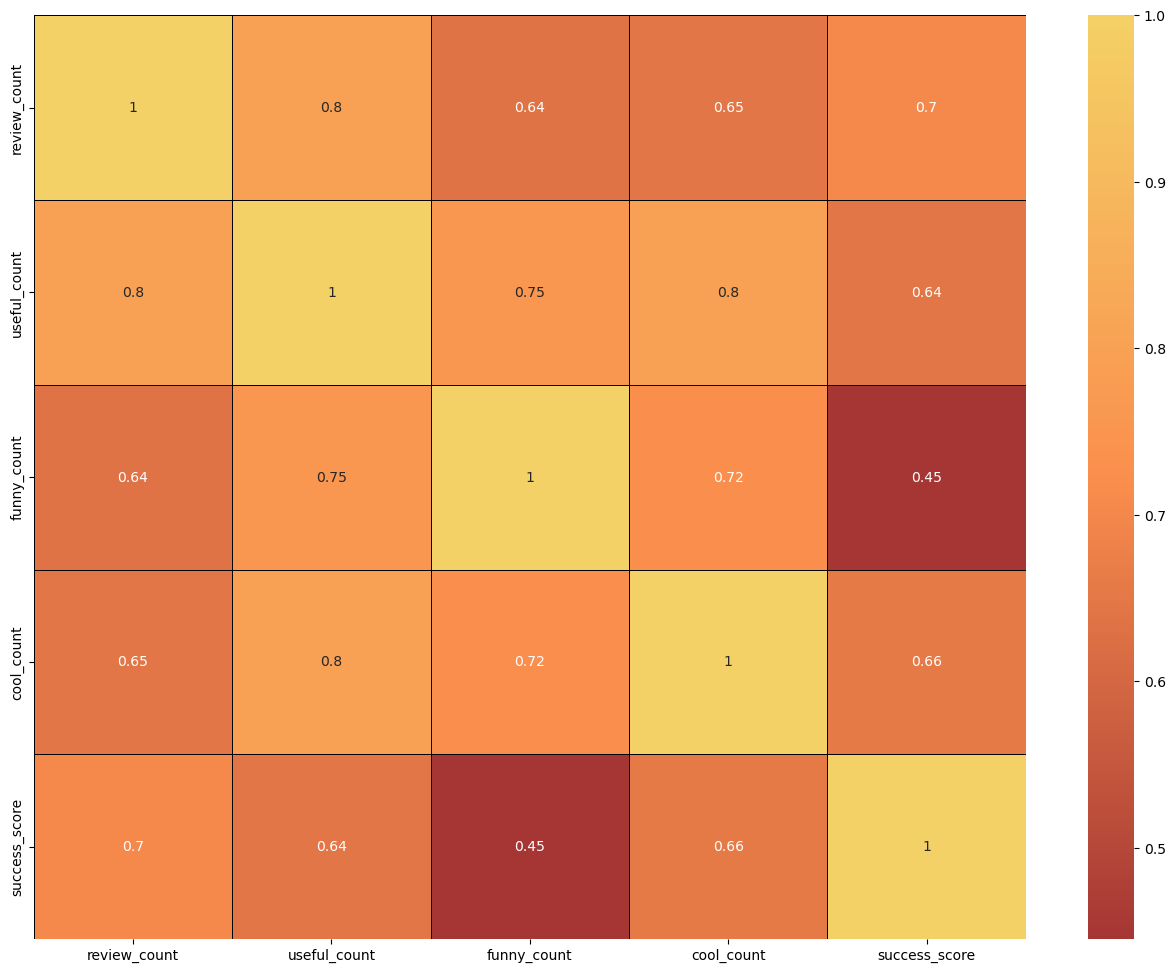

In [56]:
# How does the sentiment of reviews and tips (useful, funny, cool) correlate with the success metrics of restaurants?
sentiment_df = pd.read_sql_query(f"""SELECT b.business_id, AVG(b.stars) as avg_rating, SUM(b.review_count) as review_count, 
SUM(s.useful_count) as useful_count,
SUM(s.funny_count) as funny_count,
SUM(s.cool_count) as cool_count
FROM
(SELECT business_id,
    SUM(useful) as useful_count,
    SUM(funny) as funny_count,
    SUM(cool) as cool_count
FROM
    review
GROUP BY business_id) as s
JOIN business as b on b.business_id = s.business_id

WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY b.business_id 
ORDER BY review_count""",conn)

sentiment_df = remove_outliers(sentiment_df,'review_count')
sentiment_df = remove_outliers(sentiment_df,'useful_count')
sentiment_df = remove_outliers(sentiment_df,'funny_count')
sentiment_df = remove_outliers(sentiment_df,'cool_count')

sentiment_df['success_score'] = calculate_success_metric(sentiment_df)

#Creating the custom color map
colors = ['#a53634', '#fa8f4d','#f4d166']
custom_cmap = LinearSegmentedColormap.from_list("mycmap", colors)

# Plotting the heatmap
sns.heatmap(sentiment_df.iloc[:,2:].corr(), cmap = custom_cmap, annot = True, linewidths=0.5, linecolor='black')
plt.show()

**Insights :**
* Useful, funny, and cool counts from reviews are strongly correlated with review count, suggesting that more engaging and well-received reviews lead to higher overall review activity.
* Useful counts have the strongest correlation with other engagement metrics (review count, cool count), indicating that reviews perceived as helpful play a key role in driving engagement
* Higher counts of useful, funny, and cool reviews are associated with a higher success score, highlighting the importance of engaging user feedback for restaurant success.
* Overall, user sentiment metrics contribute significantly to a restaurant's performance, with higher engagement across these categories linked to better business outcomes.


Correlation between review count and fans (All Users): 0.53
Correlation between review count and fans (Top 10 Users): -0.06


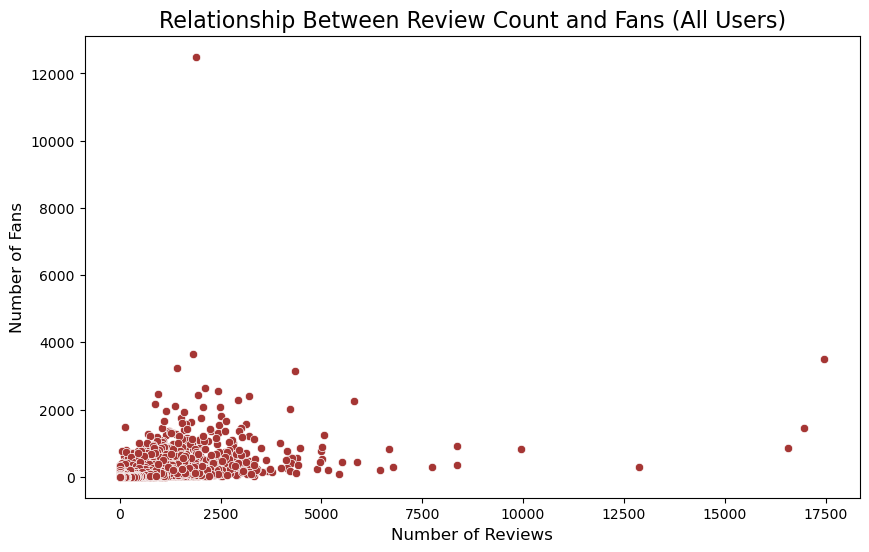

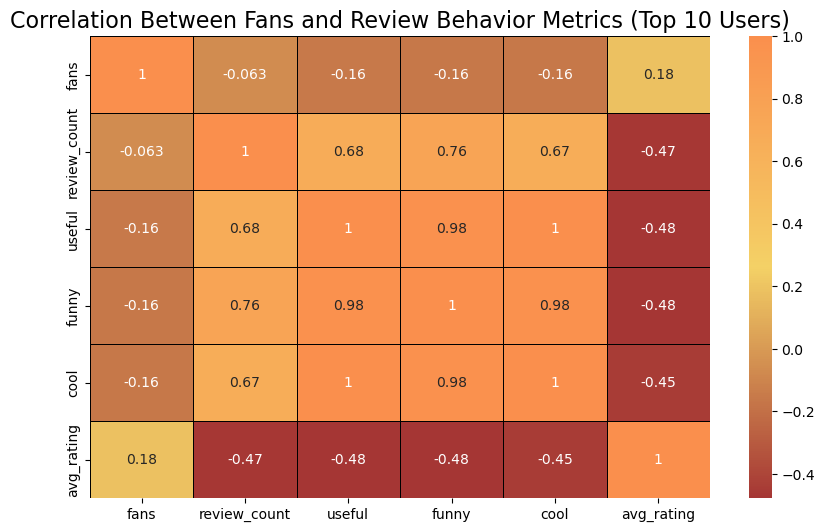

,user_id,name,review_count,fans,useful,funny,cool,avg_rating
0,37cpUoM8hlkSQfReIEBd-Q,Mike,1882,12497,22860,10965,15350,4.220339
1,hizGc5W1tBHPghM5YKCAtg,Katie,1825,3642,48711,32078,39747,4.150000
2,Hi10sGSZNxQH3NLyWSZ1oA,Fox,17473,3493,206296,185823,195814,3.898693
3,JjXuiru1_ONzDkYVrHN0aw,Richard,1424,3243,183512,129638,173423,4.000000
4,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,3138,43091,13066,27281,3.897436
5,VHdY6oG2JPVNjihWhOooAQ,Jessica,2101,2627,47831,28830,44899,4.315789
6,iLjMdZi0Tm7DQxX1C1_2dg,Ruggy,2434,2547,34949,26293,28216,3.961538
7,lt7bNHl-TXziny4FETu8nA,Megan,949,2451,22265,8640,17435,4.444444
8,fgwI3rYHOv1ipfVfCSx7pg,Emi,1926,2424,46504,33332,40870,3.965517
9,ITa3vh5ERI90G_WP4SmGUQ,Peter,3193,2388,45810,48231,35149,4.096774


In [91]:
#Do users who post more reviews tend to have more fans, and how does this relationship manifest for the top 10 users with the most fans?
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# SQL query to retrieve review count, fan count, and behavior metrics for all users
all_users_df = pd.read_sql_query(f"""
SELECT 
    u.user_id, 
    u.name, 
    u.review_count, 
    u.fans,
    u.useful, 
    u.funny, 
    u.cool
FROM user u
WHERE u.review_count IS NOT NULL AND u.fans IS NOT NULL;
""", conn)

# SQL query to get the top 10 users with the most fans
top_users_df = pd.read_sql_query(f"""
WITH top_users AS (
    SELECT 
        u.user_id, 
        u.name, 
        u.review_count, 
        u.fans,
        u.useful, 
        u.funny, 
        u.cool
    FROM user u
    ORDER BY u.fans DESC
    LIMIT 10
)
SELECT 
    tu.user_id, 
    tu.name, 
    tu.review_count, 
    tu.fans,
    tu.useful, 
    tu.funny, 
    tu.cool,
    AVG(r.stars) AS avg_rating
FROM top_users tu
LEFT JOIN review r ON tu.user_id = r.user_id
GROUP BY tu.user_id
ORDER BY tu.fans DESC;
""", conn)

# Correlation for all users
all_correlation = all_users_df[['review_count', 'fans']].corr().iloc[0, 1]
print(f"Correlation between review count and fans (All Users): {all_correlation:.2f}")

# Correlation for top 10 users
top_correlation = top_users_df[['review_count', 'fans']].corr().iloc[0, 1]
print(f"Correlation between review count and fans (Top 10 Users): {top_correlation:.2f}")

# Plotting for all users: Relationship between Review Count and Fans
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_count', y='fans', data=all_users_df, color='#a53634')
plt.title('Relationship Between Review Count and Fans (All Users)', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Number of Fans', fontsize=12)
plt.show()

# Correlation heatmap for top 10 users' review behavior and fans
correlation_matrix = top_users_df[['fans', 'review_count', 'useful', 'funny', 'cool', 'avg_rating']].corr()

# Plot the heatmap showing correlations between various metrics
colors = ['#a53634', '#f4d166', '#fa8f4d']
custom_cmap = LinearSegmentedColormap.from_list("custom_heatmap", colors)

# Plot the heatmap showing correlations between various metrics
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, linewidths=0.5, linecolor='black')
plt.title('Correlation Between Fans and Review Behavior Metrics (Top 10 Users)', fontsize=16)
plt.show()

# Now we display the dataframe for top users for better context in analysis
display(top_users_df)

**Insights :**
* For all users, there is a moderate positive correlation between the number of reviews and the number of fans, suggesting that higher review activity is generally associated with more fans.
* Among the top 10 users, however, this correlation weakens significantly, implying that once users reach a certain level of fame, additional reviews do not necessarily lead to more fans.
* Funny and cool reviews tend to correlate more with user engagement metrics (useful, funny, cool counts), while average rating has a weak negative correlation with these metrics.
* High engagement metrics such as useful, funny, and cool reviews are key drivers of fan growth for these top users, emphasizing the value of high-quality, engaging reviews over sheer quantity.

# Recommendations
* Focus on delivering exceptional experiences that align with customer preferences, behavior, and satisfaction levels to meet customer expectations.
* Leverage data on peak hours and user engagement to optimize staffing levels, resource allocation, and operating hours during high-demand periods for efficiency and quality service.
* By leveraging data on peak hours and user engagement, businesses can optimize staffing levels, resource allocation, and operating hours to ensure efficiency and quality service delivery during high-demand periods.
*Positive reviews and engagement, particularly from elite users, can boost online visibility and reputation. Maintain active engagement with customers and respond promptly to feedback to build credibility and attract new customers.
* Collaborating with elite users and leveraging their influence can amplify promotional efforts, increase brand awareness, and drive customer acquisition. Building strong relationships with key stakeholders, including loyal customers, can further strengthen a business's position in the market.
* Businesses can adjust their operating hours or introduce special promotions to capitalize on the
increased demand during peak hours.
* Less successful businesses should focus on strategies to enhance user engagement, such as improving service quality and responding to customer feedback.
* Cities with high success scores presents opportunities for restaurant chains to expand or invest
further.
* For users with high fan counts, encouraging interaction through special experiences or recognition can foster further engagement. Top users often bring visibility to businesses, and partnering with them for reviews or promotions can significantly enhance brand recognition.
* Encourage users to leave more engaging reviews (e.g., useful, funny, and cool) as these attributes drive user interaction and fan growth, particularly for high-profile users.
* In cities with lower average ratings, businesses should improve service quality and focus on underperforming categories, while cities with higher satisfaction can capitalize on preferences like Mexican cuisine in Tucson.
* Offer incentives, recognition, or loyalty programs to encourage reviews from elite users, as they provide valuable visibility and shape customer perceptions.
* Align promotions and marketing campaigns with seasonal engagement peaks (e.g., November and March) to maximize interactions and sales.
* While reviews are more common, tips offer valuable feedback. Encourage users to leave both through in-app nudges or rewards.
